In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [37]:
a=pd.read_csv("C:\\Users\\sowmy\\Downloads\\Paper1(2)\\MonthWiseMarketArrivals_Clean.csv")

In [59]:
df1=pd.DataFrame(a)
df1

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
2011-12-01,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
2012-12-01,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
2013-12-01,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013


In [60]:
df=df1.head(50)

In [61]:
df.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [63]:
df.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city', 'date'],
      dtype='object')

# set monthly date as index and drop redundant columns

In [64]:
df.index = pd.to_datetime(df.date)

In [65]:
df=df["priceMod"]

In [66]:
df

date
2005-01-01     446
2006-01-01     563
2010-01-01    1460
2011-01-01    3433
2012-01-01     605
2013-01-01    1605
2014-01-01    1256
2015-01-01    1613
2005-02-01     324
2006-02-01     380
2010-02-01    1322
2011-02-01    1125
2012-02-01     570
2013-02-01    1629
2014-02-01     983
2015-02-01    1688
2005-03-01     322
2006-03-01     391
2010-03-01     688
2011-03-01     855
2012-03-01     608
2013-03-01    1080
2014-03-01     994
2015-03-01    1745
2006-04-01     366
2010-04-01     611
2011-04-01     553
2012-04-01     573
2013-04-01    1035
2014-04-01     772
2005-05-01     475
2006-05-01     390
2010-05-01     494
2011-05-01     444
2012-05-01     500
2013-05-01     814
2014-05-01     953
2015-05-01    1310
2005-06-01     318
2006-06-01     300
2007-06-01     700
2010-06-01     460
2011-06-01     469
2012-06-01     557
2013-06-01    1110
2014-06-01     942
2015-06-01    1457
2005-07-01     348
2007-07-01     800
2010-07-01     617
Name: priceMod, dtype: int64

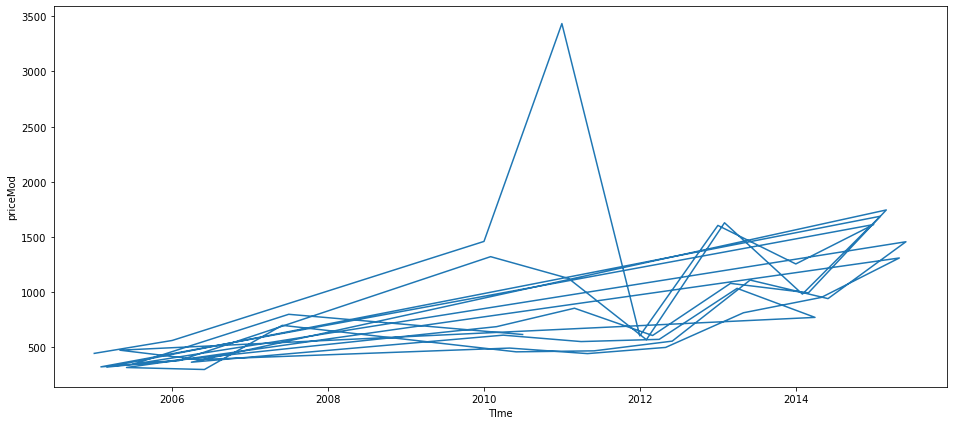

In [67]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('TIme')
ax1.set_ylabel('priceMod')
ax1.plot(df.head(50))

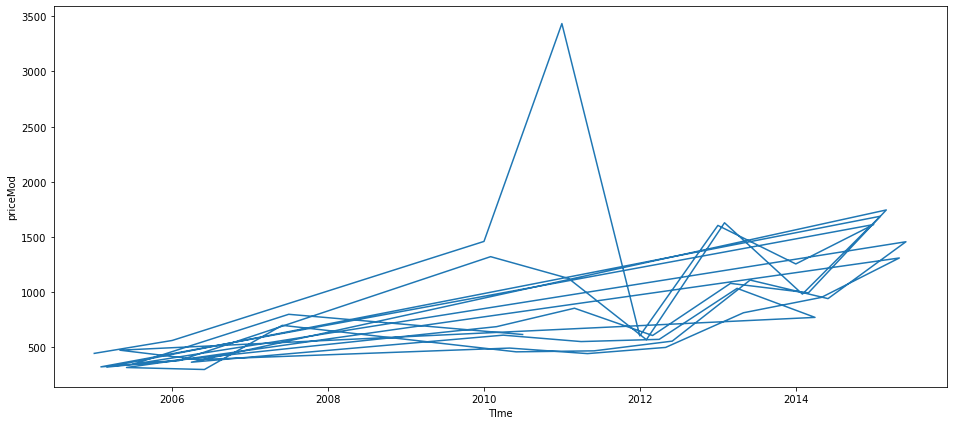

In [68]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('TIme')
ax1.set_ylabel('priceMod')
ax1.plot(df.tail(50))

# Checking stationarity

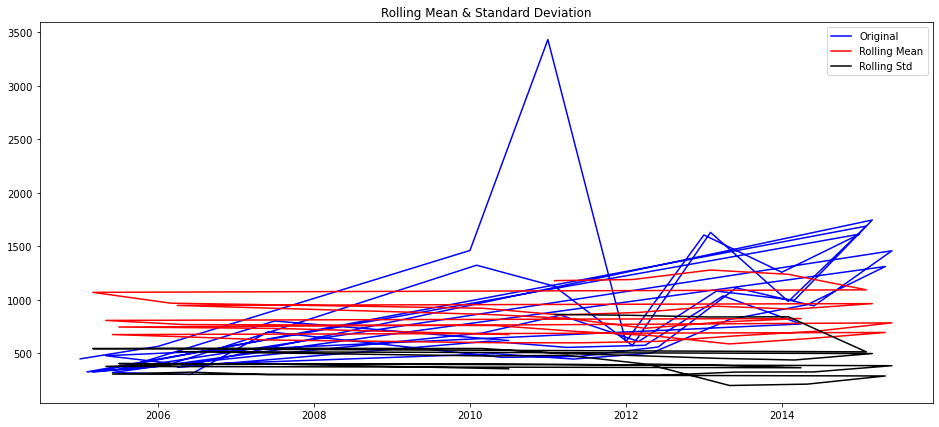

In [69]:
#Determing rolling statistics
rolLmean = df.rolling(12).mean()
rolLstd = df.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(df, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

C:\Users\sowmy\AppData\Local\Temp/ipykernel_13020/3147195532.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')


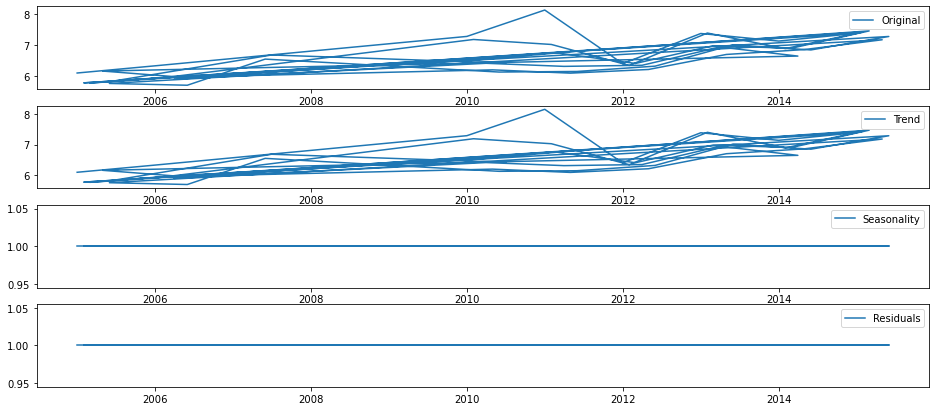

In [72]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

here ,we can able to see that trend and seasonality increases increases

here we can see that it was somewhat stationary with mean =0 and SD=1

In [79]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < import statsmodels.tsa.stattools as adfuller
adfuller_result = adfuller(df, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.825308187913994
p-value: 0.05474862136786373
Critial Values:
   1%, -3.596635636000432
Critial Values:
   5%, -2.933297331821618
Critial Values:
   10%, -2.6049909750566895


hence the p value is less than 0.05 hence it is stationary we reject the null hypothesis"

# ACF AND PACF

In [82]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df, nlags=20)
lag_pacf = pacf(df, nlags=20)

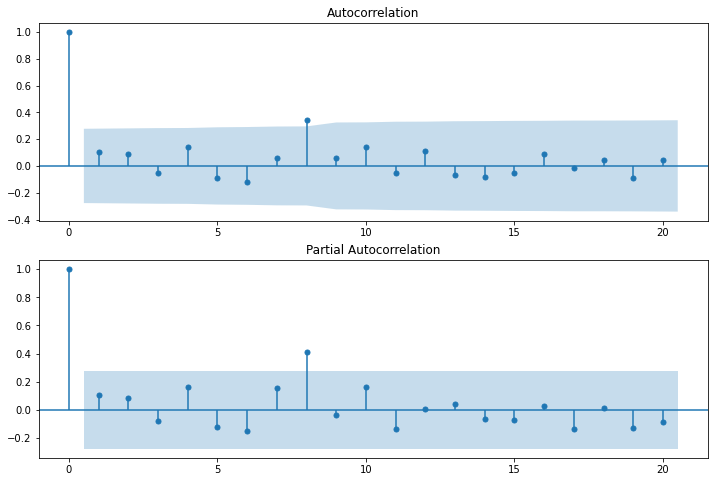

In [86]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.dropna(),lags=20,ax=ax2)

In [87]:
from statsmodels.tsa.arima_model import ARIMA

In [90]:
#ts_log_diff.dropna()
df = df[~df.isnull()]

C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\sowmy\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


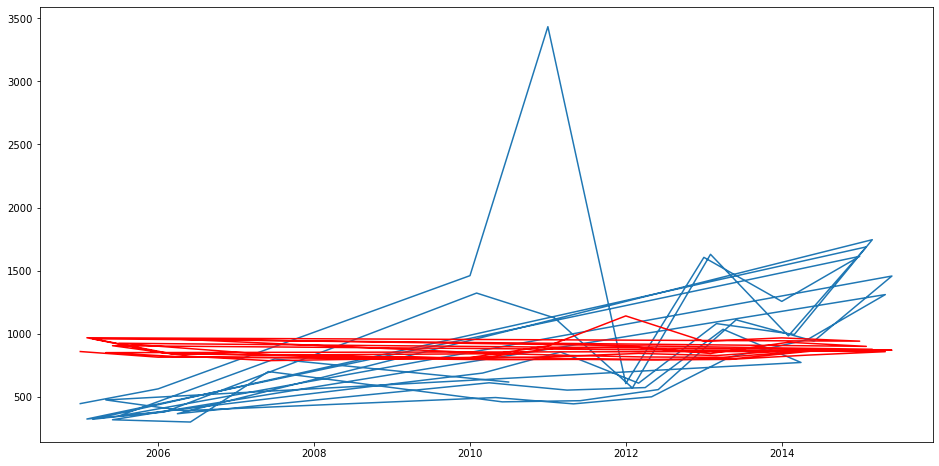

In [96]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
model = ARIMA(df, order=(1,0,1))  
results_ARIMA = model.fit()  
plt.plot(df)
plt.plot(results_ARIMA.fittedvalues, color='red')